# Сухоруков Валерий Алексеевич 19-ИВТ-3

## Вариант 9

1. Определите игрока, принявшего участие в наибольшем числе игр.
2. Вычислите корреляцию Пирсона и Спирмена между признаками Age и G. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
3. Определите год, в котором наиболее интенсивно играли в баскетбол.
4. Определите позицию (Pos), находящийся на которой игрок наиболее и наименее результативен (PTS).
5. Постройте гистограмму по признаку Year.
6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.
7. Добавьте в набор данных признак, являющийся произведением двух других признаков.
8. Определите самое популярное имя среди игроков.


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Seasons_Stats.csv')

In [3]:
df.head() # Вывести верхнюю часть таблицы

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
df.tail() # Вывести нижнюю часть таблицы

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0




df.info() - Вывести информацию о DataFrame: 
- индекс
- столбцы
- количество ненулевых значений в столбце
- тип данных в столбце
- использование памяти


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [6]:
df.describe() #Вывести описательную статистику DataFrame

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


In [7]:
df.dropna() #Отбросить из DataFrame строку с пропущенными значениями

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [8]:
df.drop_duplicates() #Отбросить из DataFrame дублирующиеся строки

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [9]:
df.shape #Вывести кортеж, представляющий размерность DataFrame

(24691, 53)


# Задание 1

### Определите игрока, принявшего участие в наибольшем числе игр.

Поиск максимального значения в столбце с индексом G - столбце количества участий в играх. Найденное значение записывается в переменную max_game.


In [10]:
max_game=df['G'].max() 

In [11]:
print(max_game)

88.0



Нахождение строки с игроком, которых принял участие в максимальном количестве игр.


In [12]:
df[df.G==max_game]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2676,2676,1969.0,Walt Bellamy*,C,29.0,TOT,88.0,NaN,3159.0,18.0,...,0.649,NaN,NaN,1101.0,176.0,NaN,NaN,NaN,320.0,1527.0



# Задание 2


### Вычислите корреляцию Пирсона и Спирмена между признаками Age и G. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


Нахождение корреляции Пирсона и Спирмена между признаками Age и G.


In [13]:
from scipy import stats

In [14]:
P=df.corr(method='pearson').Age.G

In [15]:
print(P)

0.027397610786990854


In [16]:
S=df.corr(method='spearman').Age.G

In [17]:
print(S)

0.03842520100651231



Корреляции Пирсона и Спирмена малы, значит признаки Age и G независимы.



Постоение гистограмм для признаков Age и G


<AxesSubplot:>

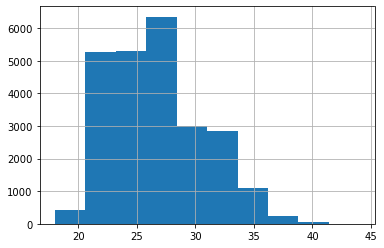

In [18]:
df.Age.hist()

<AxesSubplot:>

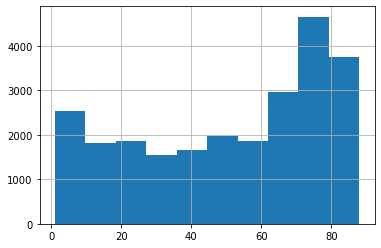

In [19]:
df.G.hist()


Оценка значения p-value для признаков Age и G


In [20]:
print('p-value')
pValueValues = df[['Age', 'G']]
pValueValues = pValueValues[(pValueValues['Age'] > 0) & (pValueValues['G'] > 0)]
print(stats.pearsonr(pValueValues['Age'], pValueValues['G']))

p-value
(0.027397610786996554, 1.7146738628467893e-05)



# Задание 3


### Определите год, в котором наиболее интенсивно играли в баскетбол.


In [21]:
df['Year'].value_counts().idxmax()

2015.0


# Задание 4

### Определите позицию (Pos), находящийся на которой игрок наиболее и наименее результативен (PTS).


Нахождение максимального значения PTS

In [22]:
max_pts=df['PTS'].max()
print(max_pts)

4029.0



Нахождение позиции с максимальным значением PTS


In [23]:
df[df['PTS']==max_pts]['Pos']

1706    C
Name: Pos, dtype: object

Нахождение минимального значения PTS

In [24]:
min_pts=df['PTS'].min()
print(min_pts)

0.0



Нахождение позиций с минимальным значением PTS


In [25]:
df[df['PTS']==min_pts]['Pos']

132       C
320       F
816       F
843       F
860       C
         ..
24272    SG
24344    SG
24349    SG
24387    PF
24623    SF
Name: Pos, Length: 287, dtype: object


# Задание 5 

### Постройте гистограмму по признаку Year.


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

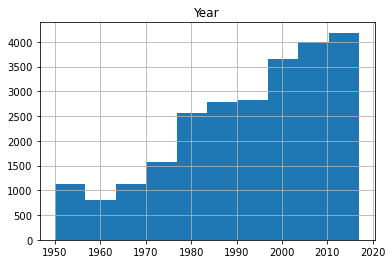

In [26]:
df.hist('Year')


# Задание 6

### Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.


In [27]:
df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [28]:
df.dropna()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS



# Задание 7

### Добавьте в набор данных признак, являющийся произведением двух других признаков.


In [29]:
df['GA'] = df['FG'] * df['Age'] #GA = Filed Goals * Age
print(df.head())

   Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS      GA  
0  ...  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  4464.0  
1  ...  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  2958.0  
2  ...  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  4350.0  
3  ...  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0   528.0  
4  ...  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0   504.0  

[5 rows x 54 columns]



# Задание 8

### Определите самое популярное имя среди игроков.

In [30]:
from collections import Counter
#Отделяем имена от фамилий
names = df.Player.apply(lambda x: x.split(' ')[0] if type(x)==str else x)
sonames = df.Player.apply(lambda x: x.split(' ')[1] if type(x)==str else x)
#создаем множество чтобы отбросить повторяющиеся парым (имя, фамилия) 
#(так как в таблице записьоб одном и том же игроке может встречаться несколько раз)
players = {(names[i], sonames[i]) for i in range(len(names))}
un_names = tuple(player[0] for player in players)
print("Most popular name:", max(Counter(un_names).items(), key=lambda x: x[1])[0])

Most popular name: John
